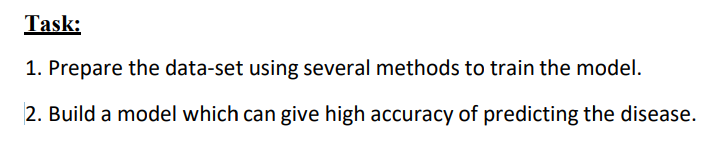

***Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.***

**Early Signs of Diabetes**

* Hunger and fatigue. Your body converts the food you eat into glucose that your cells use for energy*
* Peeing more often and being thirstier
* Dry mouth and itchy skin
* Blurred vision


# IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
print(np.__version__)
print(pd.__version__)
print(sp.__version__)


1.21.6
1.3.5
1.4.1


# LOADING THE DATASET

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv') 


In [ ]:
data.head()  #displaying the head of dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
data.describe()      #description of dataset 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
data.shape    #768 rows and 9 columns

(2000, 9)

In [ ]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
2            81       72             15             76       30.1  0.547                     25   0          6
             83       65             28             66       36.8  0.629                     24   0          5
6            154      74             32             193      29.3  0.839                     39   0          5
3            80       0              0              0        0.0   0.174                     22   0          5
4            125      70             18             122      28.9  1.144                     45   1          5
                                                                                                            ..
7            125      86             0              0        37.6  0.304                     51   0          1
0            117      66             31             188      30.8  0.493                     22   0          1
1     

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

***Checking Null Values***

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
data.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# Exploratory Data Analysis

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


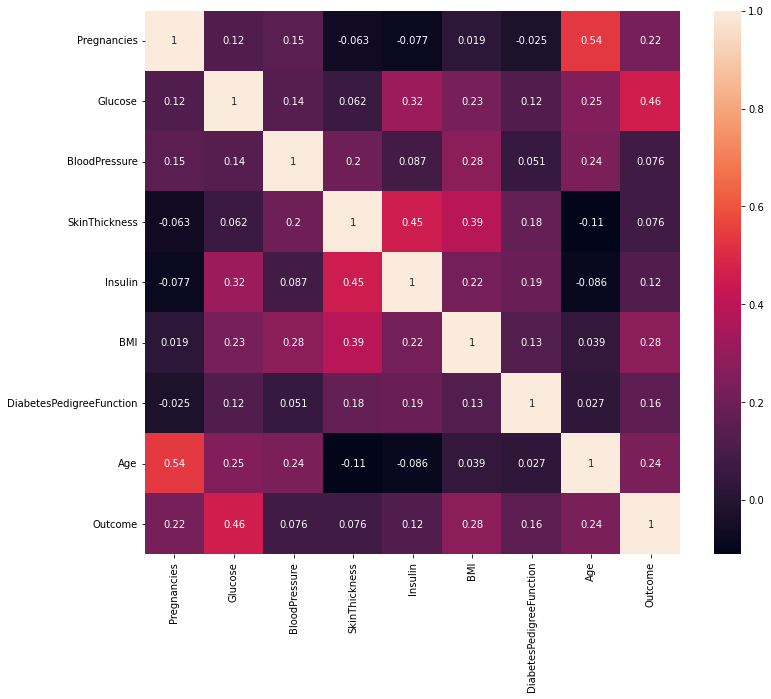

In [ ]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)



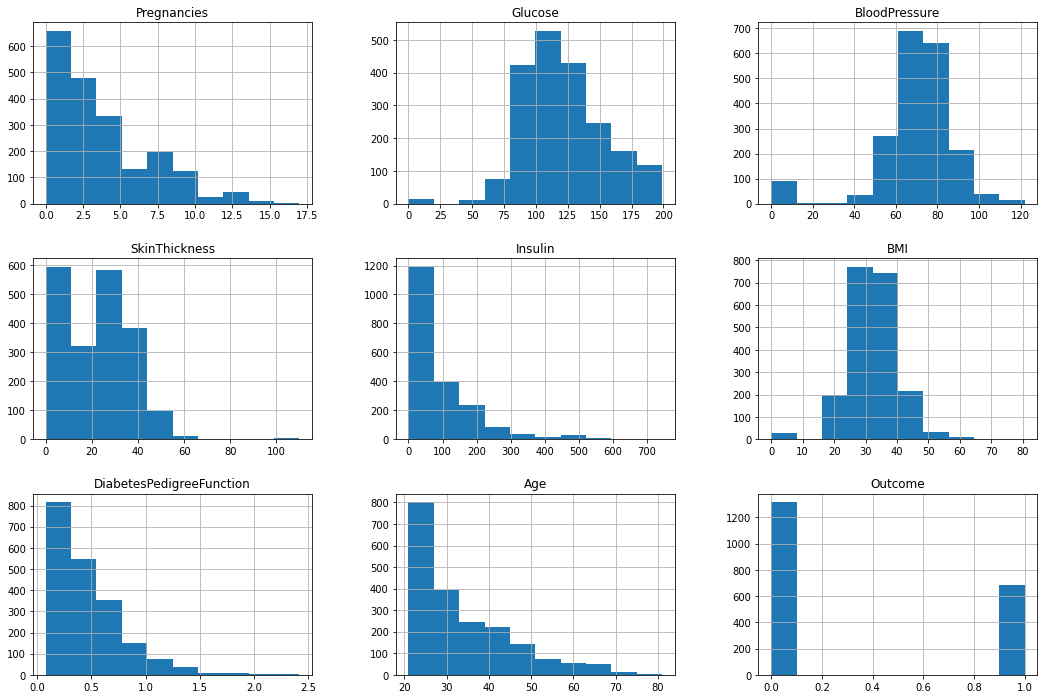

In [ ]:
data.hist(figsize=(18,12))
plt.show()



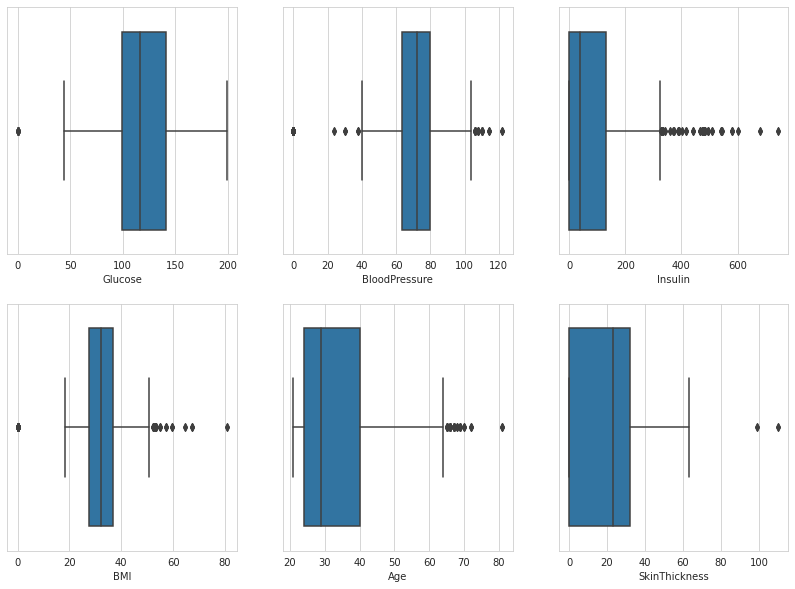

In [ ]:

plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)







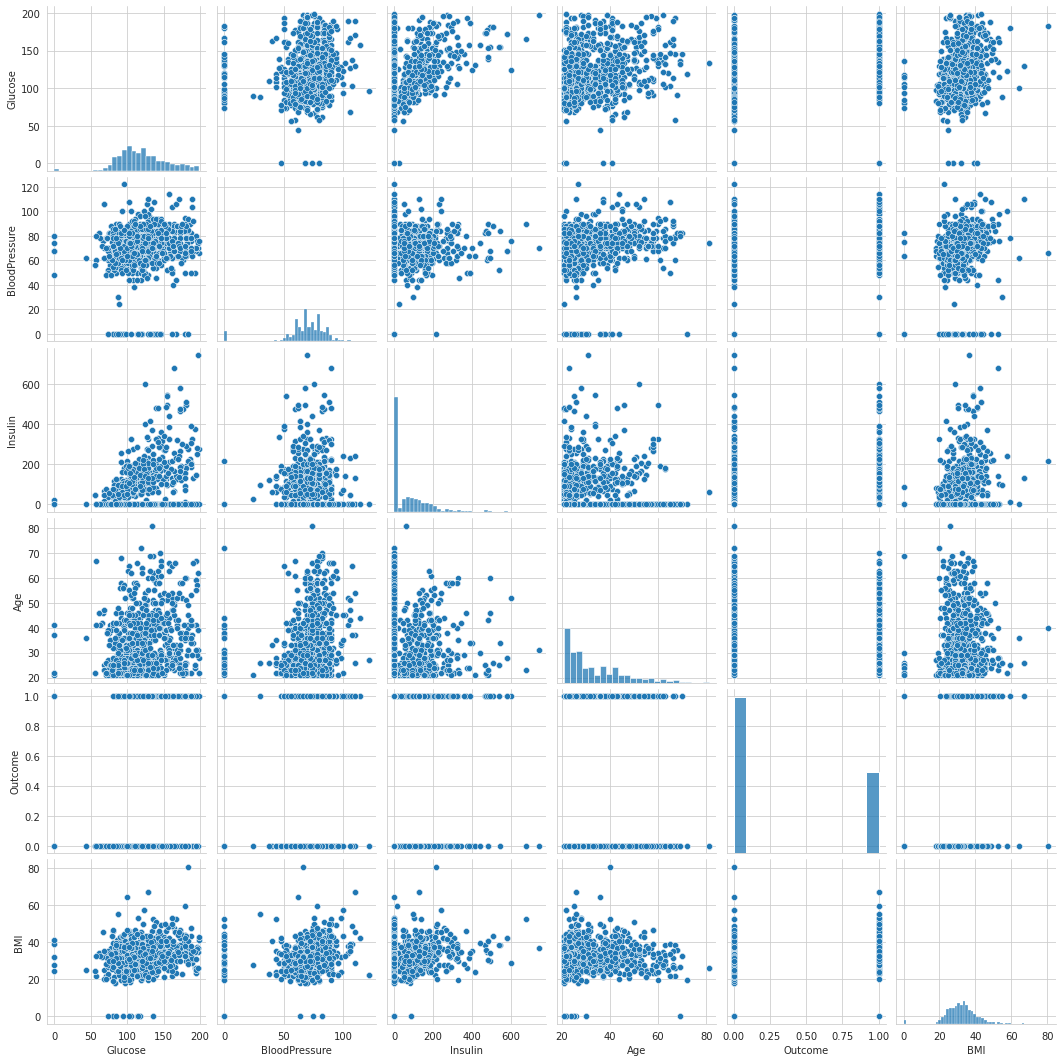

In [ ]:
 
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(data[mean_col],palette='Accent')


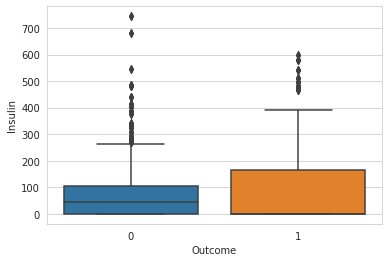

In [ ]:
sns.boxplot(x='Outcome',y='Insulin',data=data)



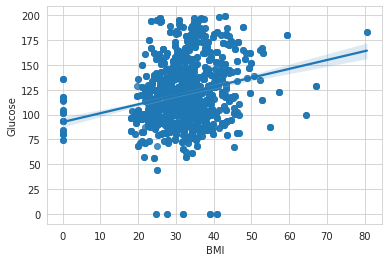

In [ ]:
sns.regplot(x='BMI', y= 'Glucose', data=data)

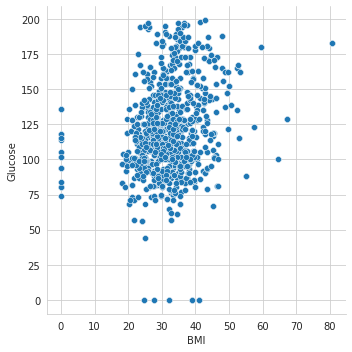

In [ ]:
sns.relplot(x='BMI', y= 'Glucose', data=data)

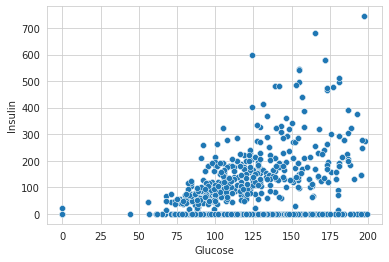

In [ ]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=data)

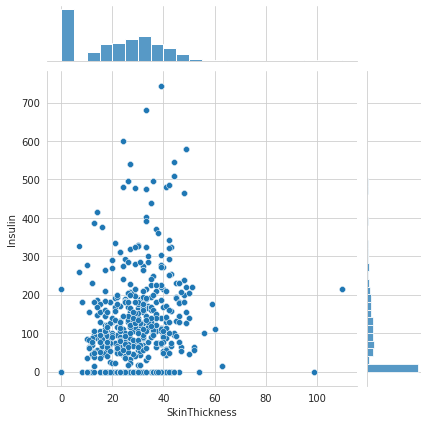

In [ ]:
sns.jointplot(x='SkinThickness', y= 'Insulin', data=data)

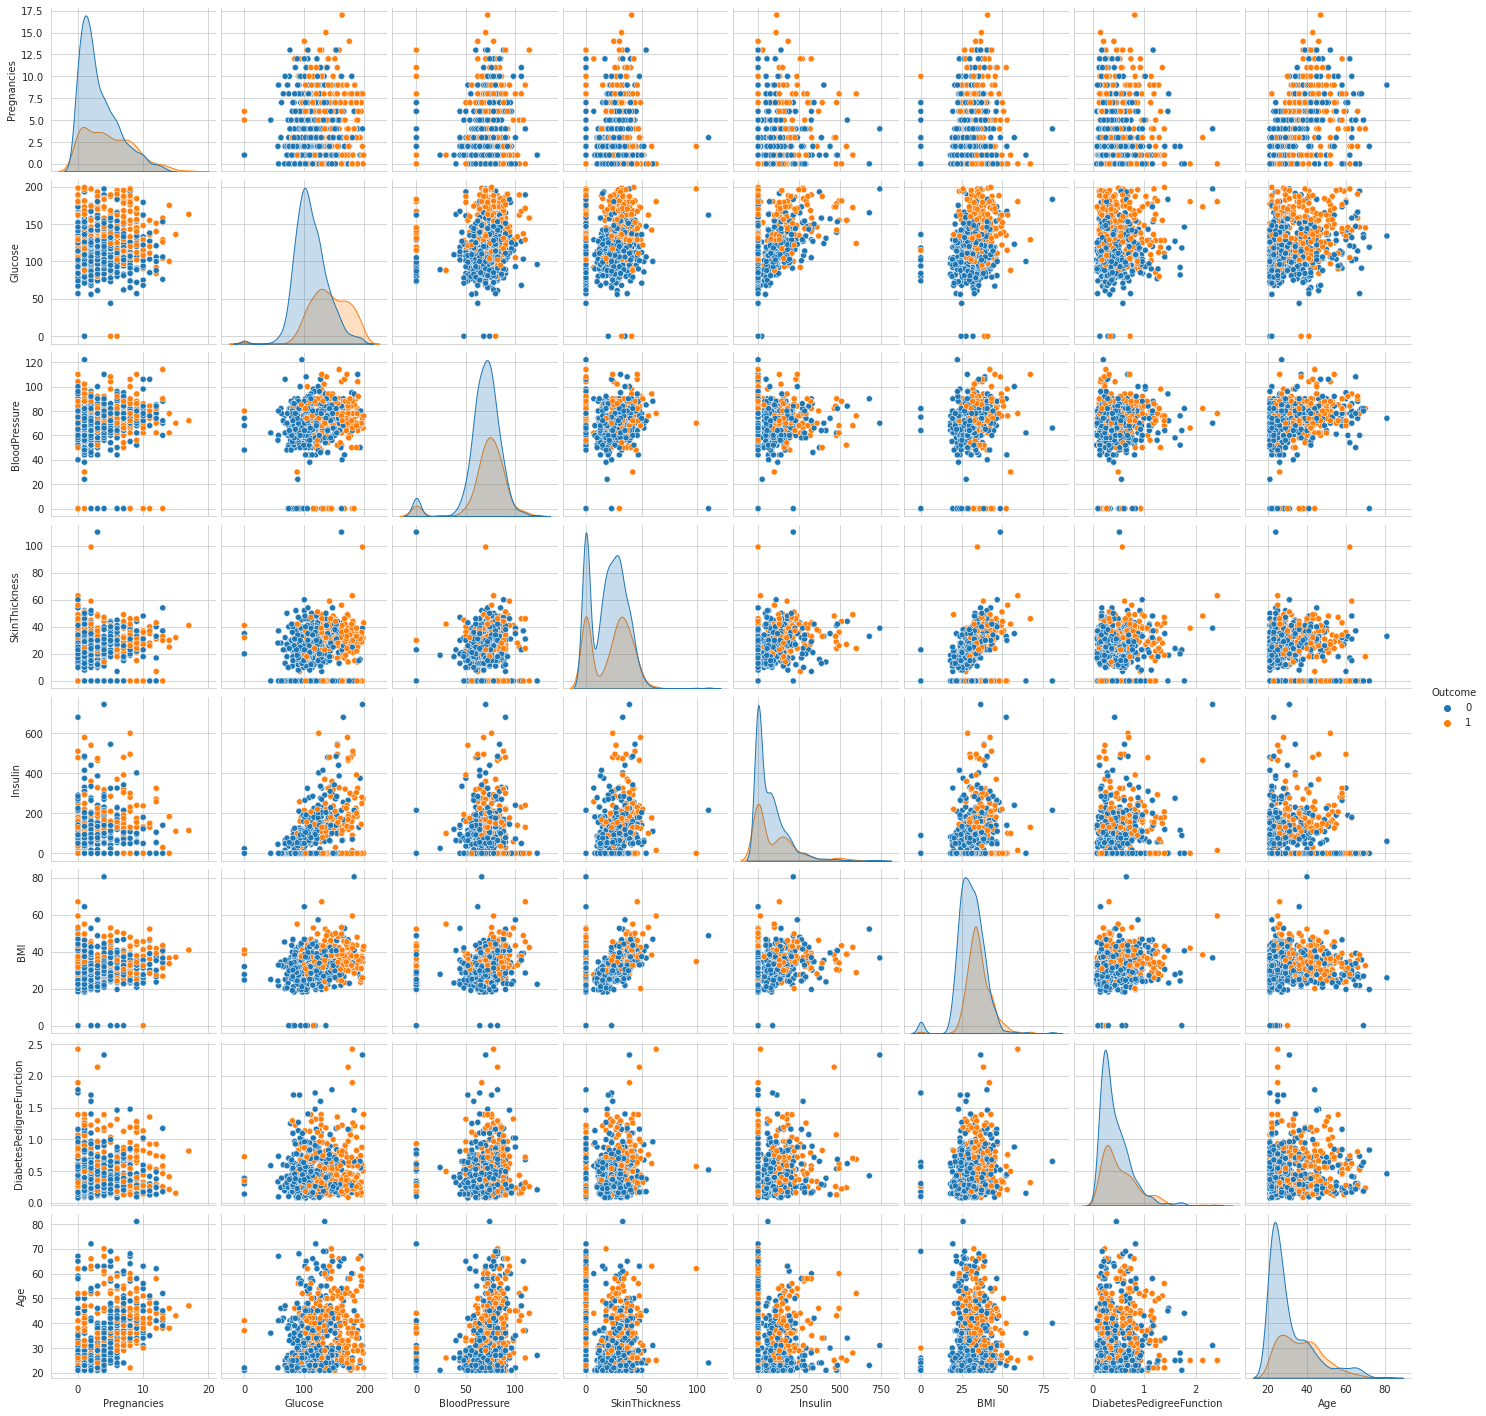

In [ ]:
sns.pairplot(data,hue='Outcome')


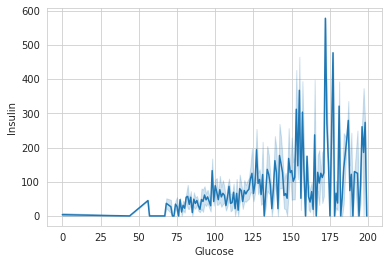

In [ ]:
sns.lineplot(x='Glucose', y= 'Insulin', data=data)

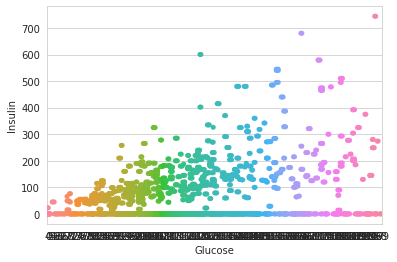

In [ ]:
sns.swarmplot(x='Glucose', y= 'Insulin', data=data)

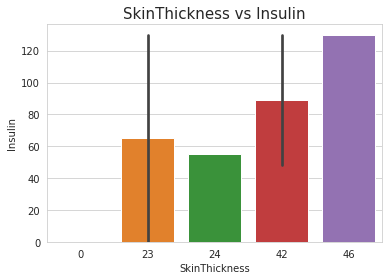

In [ ]:
sns.barplot(x="SkinThickness", y="Insulin", data=data[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")


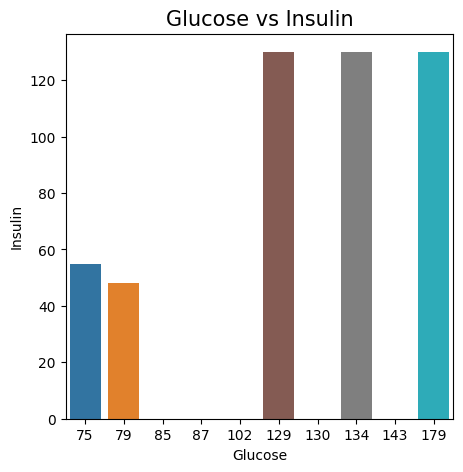

In [ ]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=data[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()


# TRAINING AND TESTING DATA

In [ ]:
#train_test_splitting of the dataset

x = data.drop(columns = 'Outcome')
# x = data.drop(["BloodPressure","SkinThickness","Outcome"],axis = 1) // droping due to less corelation with output

# Getting Predicting Value
y = data['Outcome']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)



In [ ]:
#Feature Scaling - To standardize the independent features present in the data in a fixed range.
#If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller
#values as the lower values, regardless of the unit of the values. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


1600
400
1600
400


# MODELS

# 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)                         

LogisticRegression()

In [ ]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
train_score = reg.score(x_train,y_train)*100
mse = mean_squared_error(y_test,y_pred)
r2sc = r2_score(y_test,y_pred);

print('classification report \n',report,'\n confusion matrix \n',cm,'\n training score \n',train_score,'\n mean squared error \n',mse,'\n R2 score \n',r2sc)


classification report 
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       272
           1       0.70      0.54      0.61       128

    accuracy                           0.78       400
   macro avg       0.75      0.72      0.73       400
weighted avg       0.77      0.78      0.77       400
 
 confusion matrix 
 [[243  29]
 [ 59  69]] 
 training score 
 78.25 
 mean squared error 
 0.22 
 R2 score 
 -0.011029411764706065


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

78.0


**So we get a accuracy score of 78 % using Logistic Regression**




# 2. KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# knn=KNeighborsClassifier(n_neighbors=7)
knn = KNeighborsClassifier(n_neighbors =25, metric = 'minkowski') 
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
train_score = knn.score(x_train,y_train)*100
mse = mean_squared_error(y_test,y_pred)
r2sc = r2_score(y_test,y_pred);

print('classification report \n',report,'\n confusion matrix \n',cm,'\n training score \n',train_score,'\n mean squared error \n',mse,'\n R2 score \n',r2sc)


classification report 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       272
           1       0.64      0.48      0.54       128

    accuracy                           0.74       400
   macro avg       0.71      0.67      0.68       400
weighted avg       0.73      0.74      0.73       400
 
 confusion matrix 
 [[237  35]
 [ 67  61]] 
 training score 
 77.375 
 mean squared error 
 0.255 
 R2 score 
 -0.171875


In [ ]:
print(accuracy_score(y_test,y_pred)*100)



74.5


**So we get a accuracy score of 74.5 % using KNeighborsClassifier**

# 3. SVC

In [ ]:
from sklearn.svm import SVC

svc=SVC(kernel="linear",random_state=0)
svc.fit(x_train, y_train)


SVC(kernel='linear', random_state=0)

In [ ]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
train_score = svc.score(x_train,y_train)*100
mse = mean_squared_error(y_test,y_pred)
r2sc = r2_score(y_test,y_pred);

print('classification report \n',report,'\n confusion matrix \n',cm,'\n training score \n',train_score,'\n mean squared error \n',mse,'\n R2 score \n',r2sc)


classification report 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       272
           1       0.68      0.55      0.61       128

    accuracy                           0.78       400
   macro avg       0.75      0.72      0.73       400
weighted avg       0.77      0.78      0.77       400
 
 confusion matrix 
 [[239  33]
 [ 57  71]] 
 training score 
 77.625 
 mean squared error 
 0.225 
 R2 score 
 -0.03400735294117663


In [ ]:


print(accuracy_score(y_test,y_pred)*100)


77.5


**So we get a accuracy score of 77.5 % using SVC**

# 4. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [ ]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
train_score = gnb.score(x_train,y_train)*100
mse = mean_squared_error(y_test,y_pred)
r2sc = r2_score(y_test,y_pred);

print('classification report \n',report,'\n confusion matrix \n',cm,'\n training score \n',train_score,'\n mean squared error \n',mse,'\n R2 score \n',r2sc)


classification report 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       272
           1       0.63      0.57      0.60       128

    accuracy                           0.76       400
   macro avg       0.72      0.71      0.71       400
weighted avg       0.75      0.76      0.75       400
 
 confusion matrix 
 [[230  42]
 [ 55  73]] 
 training score 
 76.0 
 mean squared error 
 0.2425 
 R2 score 
 -0.1144301470588236


In [ ]:
print("Accuracy Score:\n",gnb.score(x_train,y_train)*100)

Accuracy Score:
 76.0


**So we get a accuracy score of 76.0 % using Naiye Bayes**

# 5. DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [ ]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
train_score = dtree.score(x_train,y_train)*100
mse = mean_squared_error(y_test,y_pred)
r2sc = r2_score(y_test,y_pred);

print('classification report \n',report,'\n confusion matrix \n',cm,'\n training score \n',train_score,'\n mean squared error \n',mse,'\n R2 score \n',r2sc)


classification report 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       272
           1       0.85      0.64      0.73       128

    accuracy                           0.85       400
   macro avg       0.85      0.79      0.81       400
weighted avg       0.85      0.85      0.84       400
 
 confusion matrix 
 [[257  15]
 [ 46  82]] 
 training score 
 85.5625 
 mean squared error 
 0.1525 
 R2 score 
 0.29917279411764697


In [ ]:
print(accuracy_score(y_test,y_pred)*100)



84.75


**So we get accuracy score of 84.75 % using DecisionTreeClassifier**

# 6.  RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='gini', max_depth=4, min_samples_leaf=1, min_samples_split=2)
rfc.fit(x_train,y_train)


rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
train_score = rfc.score(x_train,y_train)*100
mse = mean_squared_error(y_test,y_pred)
r2sc = r2_score(y_test,y_pred);

print('classification report \n',report,'\n confusion matrix \n',cm,'\n training score \n',train_score,'\n mean squared error \n',mse,'\n R2 score \n',r2sc)


classification report 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       272
           1       0.77      0.56      0.65       128

    accuracy                           0.81       400
   macro avg       0.80      0.74      0.76       400
weighted avg       0.80      0.81      0.80       400
 
 confusion matrix 
 [[251  21]
 [ 56  72]] 
 training score 
 82.6875 
 mean squared error 
 0.1925 
 R2 score 
 0.11534926470588225


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

80.75


**So we get a accuracy score of 80.75 % using RandomForestClassifier**

# 7. AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)




AdaBoostClassifier()

In [ ]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
train_score = adb.score(x_train,y_train)*100
mse = mean_squared_error(y_test,y_pred)
r2sc = r2_score(y_test,y_pred);

print('classification report \n',report,'\n confusion matrix \n',cm,'\n training score \n',train_score,'\n mean squared error \n',mse,'\n R2 score \n',r2sc)


classification report 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       272
           1       0.69      0.61      0.65       128

    accuracy                           0.79       400
   macro avg       0.76      0.74      0.75       400
weighted avg       0.78      0.79      0.78       400
 
 confusion matrix 
 [[237  35]
 [ 50  78]] 
 training score 
 82.75 
 mean squared error 
 0.2125 
 R2 score 
 0.02343749999999989


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

78.75


**So we get a accuracy score of 78.75 % using AdaBoostClassifier**

# 8. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


GradientBoostingClassifier()

In [ ]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
train_score = gbc.score(x_train,y_train)*100
mse = mean_squared_error(y_test,y_pred)
r2sc = r2_score(y_test,y_pred);

print('classification report \n',report,'\n confusion matrix \n',cm,'\n training score \n',train_score,'\n mean squared error \n',mse,'\n R2 score \n',r2sc)


classification report 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       272
           1       0.85      0.69      0.76       128

    accuracy                           0.86       400
   macro avg       0.86      0.81      0.83       400
weighted avg       0.86      0.86      0.86       400
 
 confusion matrix 
 [[256  16]
 [ 40  88]] 
 training score 
 92.3125 
 mean squared error 
 0.14 
 R2 score 
 0.3566176470588235


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

86.0


**So we get a accuracy score of 86.0 % using GradientBoostingClassifier**

# 9. XGBClassifier

In [ ]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


[15:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
              objective='reg:linear')

In [ ]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
train_score = xgb.score(x_train,y_train)*100
mse = mean_squared_error(y_test,y_pred)
r2sc = r2_score(y_test,y_pred);

print('classification report \n',report,'\n confusion matrix \n',cm,'\n training score \n',train_score,'\n mean squared error \n',mse,'\n R2 score \n',r2sc)


classification report 
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       272
           1       0.85      0.48      0.62       128

    accuracy                           0.81       400
   macro avg       0.82      0.72      0.74       400
weighted avg       0.81      0.81      0.79       400
 
 confusion matrix 
 [[261  11]
 [ 66  62]] 
 training score 
 86.6875 
 mean squared error 
 0.1925 
 R2 score 
 0.11534926470588225


In [ ]:
xbg_accuracy=print(accuracy_score(y_test,y_pred)*100)

80.75


**So we get a accuracy score of 80.75 % using XGBClassifier**

***So now we conclude the accuracy of different models:***

* Logistic Regression= 78 %
* KNeighbors Classifier= 74.5 %
* SVC= 77.5 %
* Naiye Bayes= 76 %
* Decision Tree Classifier= 84.75 %
* Random Forest Classifier= 80.75 %
* Ada Boost Classifier= 78.75 %
* Gradient Boosting Classifier= 86.0 %
* XGB Classifier= 80.75 %






# Exporting model

In [ ]:
import pickle
pickle.dump(svc, open('svc_model.pkl', 'wb'))


In [ ]:
pickle.dump(sc, open('sc.pkl', 'wb'))